# Overview 

(Please ignore this section if it doesn't make any sense) 

> Initial Plan/Idea: \

1. Get NEWS using some NEWS API: GNEWS
2. Preprocess the NEWS data for the NER model
3. Use an pre-trained NER model from Hugging Face Hub
4. Data annotation for custom NER model with additional Entities
5. Train the custom NER model
6. Entity level Sentiment Analysis (or)
7. Aspect based Sentiment Analysis

> Edit: 27-04-23 \

1. Get NEWS headlines or description for an index (S&P500 or Nifty50)
2. Make a list of all the companies that are in the index (Eg: companies in Nifty50).
3. Use Aspect Based Sentiment Analysis (ABSA) for the index (like s&p500) and all those companies.
4. Umm is this a fundamental analysis or technical analysis.
5. Explain how this can be helpful for traders. Use the example: Remember when \
Infosys report was released and when the market opened in the first 3 mins \
there was a huge Red candle in Nifty50? 17-04-23 Bank-Nifty.

> Edit: 01-05-23 \

NEWS API check ✅ \

ABSA financial dataset:  [Aspect based Sentiment Analysis for Financial News (Kaggle)](https://www.kaggle.com/datasets/ankurzing/aspect-based-sentiment-analysis-for-financial-news) Yay! ✅

### Approach Options: 
1. Use UBIAI to annotate data for Joint Entities and Relation Extraction \
Classifier: [UBIAI guide for the same](https://towardsdatascience.com/how-to-train-a-joint-entities-and-relation-extraction-classifier-using-bert-transformer-with-spacy-49eb08d91b5c). Then apply sentiment analysis.
2. Use [SpaCy Dependency Sparcer](https://spacy.io/usage/rule-based-matching#dependencymatcher), then apply sentiment analysis.
3. Use PyABSA for aspect based sentiment analysis. [Github](https://github.com/yangheng95/PyABSA).
4. Use Span-ASTE paper implementation for ABSA. [Github](https://github.com/chiayewken/Span-ASTE).
5. Use [ScalaConsultants/Aspect-Based-Sentiment-Analysis](https://github.com/ScalaConsultants/Aspect-Based-Sentiment-Analysis) for ABSA.
6. Use Spacy and TextBlob for ABSA. Amazing blog on the same: [this one](https://towardsdatascience.com/aspect-based-sentiment-analysis-using-spacy-textblob-4c8de3e0d2b9).
7. Use Hugging Face; FinBERT, Financial ABSA dataset from kaggle, train a \
custom ABSA with that data. 
8. Showcase our ai21 ABSA results. Super freakin easy!!! (nope, this is not sponsored). \
All I did was shove the Financial ABSA dataset to train the model
and the results are amazing. \
Genuinely amazed. Link to my [github-ai21-repo](https://github.com/Maddy011/news-absa-ai21).

**Note**: If you found any Github resource useful, make sure to support them by \
 giving em a star! Thankyou :)

# Purpose of this Notebook

1. Explain why we are using news data for analysing the sentiment for each aspect. \
2. Not a financial advice disclosure. 


> **Important Note:** \

Please note that any information provided in this python notebook is for \
educational and informational purposes only and should not be considered as \
financial advice. It is important to always do your own research and consult \
with a licensed financial advisor before making any investment decisions.

In [ ]:
# install yfinance and plotly using pip
!pip install yfinance
!pip install plotly

!pip install -qq wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.1/203.1 kB 29.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00


In [ ]:
#Data Eng
import yfinance as yf

#Data viz
import plotly.graph_objs as go
from matplotlib import pyplot as plt

#Wandb
import wandb

In [ ]:
# Weights and Biases Log-in
wandb.login()

ENTITY = None # ENTER Your team name here if you have one.

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


> TICKER \

*   Infosys: INFY
*   NIFTY 50: ^NSEI
*   NIFTY BANK: ^NSEBANK






In [ ]:
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

# Initialize wandb run
run = wandb.init(project="Named_Entity_Recognition", name="Historical-price-17-04-23")

# Define the tickers and date range
tickers = ['INFY', '^NSEI', '^NSEBANK']
start_time = dt.datetime(2023, 4, 17, 9, 15, 0)
end_time = dt.datetime(2023, 4, 17, 15, 30, 0)

# Collect data for each ticker
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_time, end=end_time, interval='5m')

# Create a separate candlestick plot for each ticker
for ticker in tickers:
    fig = go.Figure()
    fig.add_trace(go.Candlestick(x=data[ticker].index,
                    open=data[ticker]['Open'],
                    high=data[ticker]['High'],
                    low=data[ticker]['Low'],
                    close=data[ticker]['Close'], name = 'market data'))
    fig.update_layout(
        title=f"{ticker} Candlestick Chart",
        yaxis_title=f"{ticker} Price (INR)")
    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="todate"),
                dict(count=7, label="7d", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="todate"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
    fig.show()
    # Log plotly chart
    wandb.log({ticker+" chart":fig})
    
# End run
run.finish()

wandb: Currently logged in as: madhana. Use `wandb login --relogin` to force relogin


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

# Initialize wandb run
run = wandb.init(project="Named_Entity_Recognition", name="Historical-price-14-04-23")

# Define the tickers and date range
tickers = ['INFY', '^NSEI', '^NSEBANK']
start_time = dt.datetime(2023, 4, 14, 9, 15, 0)
end_time = dt.datetime(2023, 4, 14, 15, 30, 0)

# Collect data for each ticker
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_time, end=end_time, interval='5m')

# Create a separate candlestick plot for each ticker
for ticker in tickers:
    fig = go.Figure()
    fig.add_trace(go.Candlestick(x=data[ticker].index,
                    open=data[ticker]['Open'],
                    high=data[ticker]['High'],
                    low=data[ticker]['Low'],
                    close=data[ticker]['Close'], name = 'market data'))
    fig.update_layout(
        title=f"{ticker} Candlestick Chart",
        yaxis_title=f"{ticker} Price (INR)")
    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="todate"),
                dict(count=7, label="7d", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="todate"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
    fig.show()
    # Log plotly chart
    wandb.log({ticker+" chart":fig})

# End run
run.finish()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^NSEI: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^NSEBANK: No data found for this date range, symbol may be delisted


### FYI section

It's important to know that the market is quite volatile after the 'reports' \
and the reason why we saw a huge red candle at the beginning (could) be due to that. \

Quarterly reports are typically released four times a year, at the end of each \
 quarter. The quarters are generally defined as follows: \

Q1: January to March \
Q2: April to June \
Q3: July to September \
Q4: October to December \
So the quarterly reports would typically be released in **April**, July, October, \
  and January. However, the exact timing of the release can vary by company.

In [ ]:
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

# Initialize wandb run
# run = wandb.init(project="Named_Entity_Recognition", name="Historical-price-14-04-23")

# Define the tickers and date range
tickers = ['INFY', '^NSEI', '^NSEBANK']
start_time = dt.datetime(2020, 1, 1, 9, 15, 0)
end_time = dt.datetime(2023, 4, 14, 15, 30, 0)

# Collect data for each ticker
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_time, end=end_time)

# Create a separate candlestick plot for each ticker
for ticker in tickers:
    fig = go.Figure()
    fig.add_trace(go.Candlestick(x=data[ticker].index,
                    open=data[ticker]['Open'],
                    high=data[ticker]['High'],
                    low=data[ticker]['Low'],
                    close=data[ticker]['Close'], name = 'market data'))
    fig.update_layout(
        title=f"{ticker} Candlestick Chart",
        yaxis_title=f"{ticker} Price (INR)")
    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="todate"),
                dict(count=7, label="7d", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="todate"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
    fig.show()
    # Log plotly chart
    # wandb.log({ticker+" chart":fig})

# End run
# run.finish()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## ABSA datasets list for reference

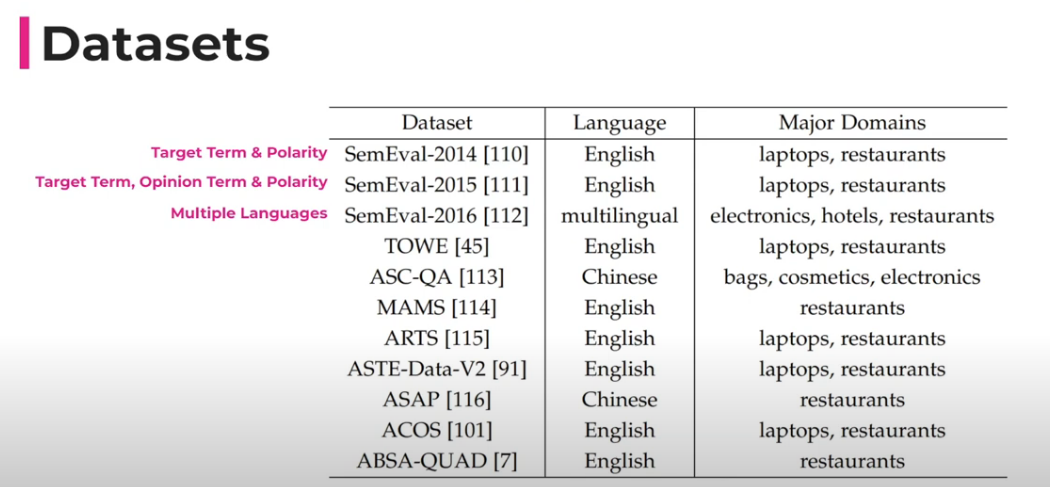

Source: [Aspect-Based Sentiment Analysis Using Prompt Engineering | Vector Applied Intern Project Talks](https://www.youtube.com/watch?v=bkq-pA5Avcg).


# NEWS API alternative

In [ ]:
'''
references:
https://pypi.org/project/gnews/
https://medium.com/analytics-vidhya/googlenews-api-live-news-from-google-news-using-python-b50272f0a8f0
'''
!pip install gnews
from gnews import GNews

google_news = GNews()
nifty50_news = google_news.get_news('Nifty50')
print(nifty50_news[0]['title'])

In [ ]:
!pip install GoogleNews
from GoogleNews import GoogleNews
import pandas as pd

googlenews=GoogleNews(start='03/04/2023',end='03/05/2023') # mm/dd/yyyy
googlenews.search('Nifty50')
result=googlenews.result()
df=pd.DataFrame(result)
df.head(20)

In [ ]:
!pip install gnewsclient
# import module
from gnewsclient import gnewsclient
 
# declare a NewsClient object
client = gnewsclient.NewsClient(language='english', location='india', topic='Business', max_results=100)
 
# get news feed
client.get_news()

In [ ]:
'''
newsapi reference: https://www.geeksforgeeks.org/fetching-top-news-using-news-api/
'''

# ABSA using ai21

In [ ]:
# Installs
!pip install -U ai21
!pip install streamlit
!pip install python-dotenv

In [ ]:
import os
import requests
import streamlit as st
import ai21
from dotenv import load_dotenv
import datetime

# Load secrets
load_dotenv()

# Set up ai21 API key 
# ai21.api_key = os.getenv("AI21_API_KEY")
ai21.api_key = 'your_ai21_api_key_here'

# Set up News API endpoint
NEWS_API_KEY = os.getenv("NEWS_API_KEY")
url = f"https://newsapi.org/v2/everything?apiKey={NEWS_API_KEY}"

st.title("NewsTrackr: AI News Aspect Based Sentiment Analysis")

# Get user topic input
topic = st.text_input("Enter the NEWS title for aspect-based sentiment analysis")
start = st.text_input("Please specify the date from which you would like to collect the news articles. (YYYY-MM-DD)")
end = st.text_input("Please specify the date till which you would like to collect the news articles. (YYYY-MM-DD)")

if st.button("Search"):
    # Set query parameters and fetch news articles from the API
    params = {"q": topic, "sortBy": "relevancy", "language": "en", "from": start, "to": end} 
    response = requests.get(url, params=params)
    articles = response.json()["articles"]

    # Process the articles and get predicted ABSA from AI model
    for article in articles:
        title = article["title"]
        content = article["content"]
        url = article['url']
        
        prompt = article["title"]
        response = ai21.Completion.execute(
            model="j2-large",
            custom_model="ASBA-j2-large-v2",
            prompt="find aspect based sentiment analysis for this text" + prompt,
            numResults=1,
            maxTokens=200,
            temperature=0.7,
            topKReturn=0,
            topP=1,
            countPenalty={
                "scale": 0,
                "applyToNumbers": False,
                "applyToPunctuations": False,
                "applyToStopwords": False,
                "applyToWhitespaces": False,
                "applyToEmojis": False
                },
            frequencyPenalty={
                "scale": 0,
                "applyToNumbers": False,
                "applyToPunctuations": False,
                "applyToStopwords": False,
                "applyToWhitespaces": False,
                "applyToEmojis": False
                },
            presencePenalty={
                "scale": 0,
                "applyToNumbers": False,
                "applyToPunctuations": False,
                "applyToStopwords": False,
                "applyToWhitespaces": False,
                "applyToEmojis": False
                },
            stopSequences=[]
        )
        ABSA = response.completions[0].data.text          

        # Display the predicted sport for each article
        st.write(f"Article title: {title}")
        st.write(f"Aspect Sentiment: {ABSA}")
        st.write(f"Article content: {content}")
        st.write(f"Article URL: {url}")
        st.write("---")


## AI21 - LangChain Integration with WandbTracer

In [ ]:
# install the packages
!pip install ai21
!pip install langchain 
!pip install wandb

In [ ]:
# LangChain AI21 docs for reference
# https://python.langchain.com/en/latest/modules/models/llms/integrations/ai21.html

from langchain.llms import AI21
from langchain import PromptTemplate, LLMChain
import requests

In [ ]:
# get AI21_API_KEY. Use https://studio.ai21.com/account/account

from getpass import getpass
AI21_API_KEY  = getpass()

··········


In [ ]:
# Set up News API endpoint
# NEWS_API_KEY = os.getenv("NEWS_API_KEY")
NEWS_API_KEY = 'your_news_api_key_here'
url = f"https://newsapi.org/v2/everything?apiKey={NEWS_API_KEY}"

In [ ]:
news = 'Nifty50'

In [ ]:
import datetime
today = datetime.date.today() 
yesterday = today - datetime.timedelta(days=1)

# No user input for time frame (collect news data for a day) for this example
params = {"q": news, "sortBy": "relevancy", "language": "en", "from": yesterday, "to": today}
response = requests.get(url, params=params)
articles = response.json()["articles"]

In [ ]:
from wandb.integration.langchain import WandbTracer

WandbTracer.init({"project": "Named_Entity_Recognition"})

wandb: Global autologging is not currently supported for the LangChain integration.
wandb: Please directly construct a `WandbTracer` and add it to the list of callbacks. For example:
wandb: 
wandb: LLMChain(llm, callbacks=[WandbTracer()])
wandb: # end of notebook / script:
wandb: WandbTracer.finish()


Since global autologging is not currently (Early May 2023) supported for the LangChain integration. We'll initialize our wandb the usual way and use the `callbacks=[WandbTracer()]` callback instead.

In [ ]:
'''
AI21() Parameters for reference:
(*, cache: bool | None = None, verbose: bool = _get_verbosity, callbacks: Callbacks = None, callback_manager: BaseCallbackManager | None = None, model: str = "j2-jumbo-instruct", temperature: float = 0.7, maxTokens: int = 256, minTokens: int = 0, topP: float = 1, presencePenalty: AI21PenaltyData = AI21PenaltyData(), countPenalty: AI21PenaltyData = AI21PenaltyData(), frequencyPenalty: AI21PenaltyData = AI21PenaltyData(), numResults: int = 1, logitBias: Dict[str, float] | None = None, ai21_api_key: str | None = None, stop: List[str] | None = None, base_url: str | None = None) -> None
'''

In [ ]:
for article in articles:
  title = article["title"]
  content = article["content"]
  news = article["title"]
  url = article['url']
  template = """find aspect based sentiment analysis for this text: {news} """
  prompt = PromptTemplate(template=template, input_variables=["news"])
  llm = AI21(ai21_api_key = AI21_API_KEY, model = "ASBA-j2-large-v2", maxTokens=200,
             temperature=0.7,
             topP=1,
             countPenalty={
                "scale": 0,
                "applyToNumbers": False,
                "applyToPunctuations": False,
                "applyToStopwords": False,
                "applyToWhitespaces": False,
                "applyToEmojis": False
                },
             frequencyPenalty={
                "scale": 0,
                "applyToNumbers": False,
                "applyToPunctuations": False,
                "applyToStopwords": False,
                "applyToWhitespaces": False,
                "applyToEmojis": False
                },
             presencePenalty={
                "scale": 0,
                "applyToNumbers": False,
                "applyToPunctuations": False,
                "applyToStopwords": False,
                "applyToWhitespaces": False,
                "applyToEmojis": False
                })
  llm_chain = LLMChain(prompt=prompt, llm=llm, callbacks=[WandbTracer()])
  results = llm_chain.run(news)
  print(results)

wandb: Streaming LangChain activity to W&B at https://wandb.ai/madhana/uncategorized/runs/7kroffz4
wandb: `WandbTracer` is currently in beta.
wandb: Please report any issues to https://github.com/wandb/wandb/issues with the tag `langchain`.


( {"Nifty50": "positive"}


In [ ]:
WandbTracer.finish()

### Example: Without NewsAPI

In [ ]:
from wandb.integration.langchain import WandbTracer

WandbTracer.init({"project": "Named_Entity_Recognition"})

In [ ]:
template = """find aspect based sentiment analysis for this text: {news} """
prompt = PromptTemplate(template=template, input_variables=["news"])

llm = AI21(ai21_api_key = AI21_API_KEY, model = "ASBA-j2-large-v2", maxTokens=200,
            temperature=0.7,
            topP=1,
            countPenalty={
                "scale": 0,
                "applyToNumbers": False,
                "applyToPunctuations": False,
                "applyToStopwords": False,
                "applyToWhitespaces": False,
                "applyToEmojis": False
                },
            frequencyPenalty={
                "scale": 0,
                "applyToNumbers": False,
                "applyToPunctuations": False,
                "applyToStopwords": False,
                "applyToWhitespaces": False,
                "applyToEmojis": False
                },
            presencePenalty={
                "scale": 0,
                "applyToNumbers": False,
                "applyToPunctuations": False,
                "applyToStopwords": False,
                "applyToWhitespaces": False,
                "applyToEmojis": False
                })
llm_chain = LLMChain(prompt=prompt, llm=llm, callbacks=[WandbTracer()])

In [ ]:
news = "India’s most valued company by market capitalization Reliance Industries (NS:RELI) added the highest share of wealth to its kitty last week, followed by the banking behemoths State Bank of India (NS:SBI) and private lender ICICI Bank (NS:ICBK)."
llm_chain.run(news)

' {"Reliance Industries": "positive", "SBI": "positive", "ICICI Bank": "positive"}'

In [ ]:
WandbTracer.finish()

# Note

Umm👉👈 Since, I'm in a hurry and this can take a while, I'm not gonna work on \
the other approaches as of now. This is mainly because I am not even sure if someone will read this :( \
Having said that, If there's anyone who has some queries on using AI21 Studio or requires assistance \
with the other approaches mentioned at the start, feel 
free to contact me on my [linkedIn](https://www.linkedin.com/in/madhana-bala-s-k-724407179).